# Content
1. [Import rawData](#1.-Import-rawData)
2. [Compensation |Zc|](#2.-Compensation-|Zc|)
3. [Data Visualization](#3.-Data-Visualization)
    - [F vs. |Z| Plot](#F-vs.-|Z|-Plot)
    - [F vs. Θ Plot](#F-vs.-Θ-Plot)
    - [Cole-Cole Plot](#Cole-Cole-Plot)
    - [F vs. Capacitance Plot](#F-vs.-Capacitance-Plot)
    - [F vs. Condcuctance Plot](#F-vs.-Condcuctance-Plot)
    - [|Z| vs. Days Plot](#|Z|-vs.-Days-Plot)
    - [|Z| Histogram Plot](#|Z|-Histogram-Plot)
4. [PCA](#4.-PCA)
5. [ML](#5.-ML)

## 1. Import rawData

In [3]:
import pandas as pd
data = pd.read_csv('days.csv')
data

,F,Z11,Theta11,Z12,Theta12,Z13,Theta13,Unnamed: 7,Z21,Theta21,...,Theta82,Z83,Theta83,Unnamed: 56,Z91,Theta91,Z92,Theta92,Z93,Theta93
0,10000.00,1115000,-84.40,1184000,-84.10,1211000,-85.30,NaN,1155000,-84.20,...,-82.40,1031000,-80.40,NaN,1017000,-79.50,1084000,-83.90,1056000,-81.60
1,11220.18,1001000,-84.30,1172000,-86.20,1082000,-85.30,NaN,1039000,-84.40,...,-82.50,927000,-80.80,NaN,916000,-80.10,973000,-84.00,947000,-82.10
2,12589.25,897000,-84.40,1049000,-86.40,970000,-85.50,NaN,930000,-84.60,...,-82.80,833000,-81.30,NaN,824000,-80.50,873000,-84.20,853000,-82.30
3,14125.37,805000,-84.80,936000,-86.50,868000,-85.70,NaN,834000,-84.80,...,-83.00,751000,-81.70,NaN,742000,-81.00,784000,-84.40,765000,-82.80
4,15848.93,723000,-84.70,838000,-86.60,778000,-85.80,NaN,747000,-84.90,...,-83.30,674000,-81.90,NaN,666000,-81.40,702000,-84.60,685000,-83.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,6309573.00,2725,-88.10,2984,-88.88,2833,-88.54,NaN,2765,-88.42,...,-87.80,2640,-87.97,NaN,2594,-88.10,2635,-88.34,2642,-88.26
57,7079457.00,2593,-88.28,2838,-89.07,2697,-88.70,NaN,2631,-88.58,...,-87.96,2513,-88.13,NaN,2468,-88.29,2507,-88.52,2514,-88.43
58,7943282.00,2518,-88.52,2754,-89.32,2618,-88.94,NaN,2554,-88.82,...,-88.22,2440,-88.40,NaN,2397,-88.55,2434,-88.77,2441,-88.69
59,8912509.00,2515,-88.87,2748,-89.71,2614,-89.30,NaN,2551,-89.19,...,-88.57,2438,-88.75,NaN,2394,-88.91,2431,-89.14,2438,-89.07


In [4]:
## mean |Z| of 3 points sweeping frequency for each day
day1meanZ = data[['Z11','Z12','Z13']].mean(axis=1)
day2meanZ = data[['Z21','Z22','Z23']].mean(axis=1)
day3meanZ = data[['Z31','Z32','Z33']].mean(axis=1)
day4meanZ = data[['Z41','Z42','Z43']].mean(axis=1)
day5meanZ = data[['Z51','Z52','Z53']].mean(axis=1)
day6meanZ = data[['Z61','Z62','Z63']].mean(axis=1)
day7meanZ = data[['Z71','Z72','Z73']].mean(axis=1)
day8meanZ = data[['Z81','Z82','Z83']].mean(axis=1)
day9meanZ = data[['Z91','Z92','Z93']].mean(axis=1)

In [5]:
## mean theta of 3 points sweeping frequency for each day
day1meanT = data[['Theta11','Theta12','Theta13']].mean(axis=1)
day2meanT = data[['Theta21','Theta22','Theta23']].mean(axis=1)
day3meanT = data[['Theta31','Theta32','Theta33']].mean(axis=1)
day4meanT = data[['Theta41','Theta42','Theta43']].mean(axis=1)
day5meanT = data[['Theta51','Theta52','Theta53']].mean(axis=1)
day6meanT = data[['Theta61','Theta62','Theta63']].mean(axis=1)
day7meanT = data[['Theta71','Theta72','Theta73']].mean(axis=1)
day8meanT = data[['Theta81','Theta82','Theta83']].mean(axis=1)
day9meanT = data[['Theta91','Theta92','Theta93']].mean(axis=1)

## 2. Compensation |Zc| 
-Purpose: Eliminate the effects of error sources existing between Calibration Plane and DUT.

-Method: open/short compensation to eliminate the effects of fixture residuals.

-Compensation frequence reange: 10k ~ 10M Hz

-Compensation Equation:

\begin{equation}
Zc = \frac{Zm-Zs}{1-(Zm-Zs)Zo}
\end{equation}

    Where Zc: corrected impedance; Zm: sample measured impedance; Zs: short impedance; Zo: open impedance
    


In [6]:
# import rawData of |Zs| and |Zo|
dataZc = pd.read_csv('Zc.csv')
meanZs = dataZc[['Zs1','Zs2']].mean(axis=1)
meanZo = dataZc[['Zo1','Zo2']].mean(axis=1)

FileNotFoundError: [Errno 2] File Zc.csv does not exist: 'Zc.csv'

In [7]:
# calculate |Zc|
Zc1 = (day1meanZ-meanZs)/(1-(day1meanZ-meanZs)*meanZo)
Zc2 = (day2meanZ-meanZs)/(1-(day2meanZ-meanZs)*meanZo)
Zc3 = (day3meanZ-meanZs)/(1-(day3meanZ-meanZs)*meanZo)
Zc4 = (day4meanZ-meanZs)/(1-(day4meanZ-meanZs)*meanZo)
Zc5 = (day5meanZ-meanZs)/(1-(day5meanZ-meanZs)*meanZo)
Zc6 = (day6meanZ-meanZs)/(1-(day6meanZ-meanZs)*meanZo)
Zc7 = (day7meanZ-meanZs)/(1-(day7meanZ-meanZs)*meanZo)
Zc8 = (day8meanZ-meanZs)/(1-(day8meanZ-meanZs)*meanZo)
Zc9 = (day9meanZ-meanZs)/(1-(day9meanZ-meanZs)*meanZo)

NameError: name 'meanZs' is not defined

In [8]:
# create dataFrame of |Zc|
d_Zc = {'Frequency': pd.Series(data['F']), '|Zs|': pd.Series(meanZs), '|Zo|': pd.Series(meanZo)}
df_Zc = pd.DataFrame(d_Zc)
df_Zc

NameError: name 'meanZs' is not defined

In [9]:
# create dataFrame of F,|Zc|,Θ
d = {'day1_|Zc|': pd.Series(Zc1), 'day2_|Zc|': pd.Series(Zc2), 'day3_|Zc|': pd.Series(Zc3),
     'day4_|Zc|': pd.Series(Zc4), 'day5_|Zc|': pd.Series(Zc5), 'day6_|Zc|': pd.Series(Zc6),
     'day7_|Zc|': pd.Series(Zc7), 'day8_|Zc|': pd.Series(Zc8), 'day9_|Zc|': pd.Series(Zc9),
     
     'day1_T': pd.Series(day1meanT), 'day2_T': pd.Series(day2meanT), 'day3_T': pd.Series(day3meanT),
     'day4_T': pd.Series(day4meanT), 'day5_T': pd.Series(day5meanT), 'day6_T': pd.Series(day6meanT),
     'day7_T': pd.Series(day7meanT), 'day8_T': pd.Series(day8meanT), 'day9_T': pd.Series(day9meanT)}

df = pd.DataFrame(d)
df = pd.concat([df_Zc, df], axis=1)
df.to_csv('df.csv')
df

NameError: name 'Zc1' is not defined

## 3. Data Visualization

### F vs. |Z| Plot

In [10]:
# plot |Z| vs. F
# here |Z| = |Zc|
x = df['Frequency']

NameError: name 'df' is not defined

In [11]:
import matplotlib.pyplot as plt
#plt.cla()
plt.plot(x, df['day1_|Zc|'], label='|Z| Day1 (Ohms)')
plt.plot(x, df['day2_|Zc|'], label='|Z| Day2 (Ohms)')
plt.plot(x, df['day3_|Zc|'], label='|Z| Day3 (Ohms)')
plt.plot(x, df['day4_|Zc|'], label='|Z| Day4 (Ohms)')
plt.plot(x, df['day5_|Zc|'], label='|Z| Day5 (Ohms)')
plt.plot(x, df['day6_|Zc|'], label='|Z| Day6 (Ohms)')
plt.plot(x, df['day7_|Zc|'], label='|Z| Day7 (Ohms)')
plt.plot(x, df['day8_|Zc|'], label='|Z| Day8 (Ohms)')
plt.plot(x, df['day9_|Zc|'], label='|Z| Day9 (Ohms)')

plt.legend(loc='best')
plt.tight_layout()
plt.grid(True)
plt.xscale('log')
#plt.yscale('log')
plt.xlabel('Frequency (Hz)')
plt.ylabel('|Z| (Ohms)')
plt.title('F vs. |Z| Plot')
plt.savefig(fname='FvsZ.png', dpi=300)

plt.show()

NameError: name 'x' is not defined

### F vs. Θ Plot

NameError: name 'x' is not defined

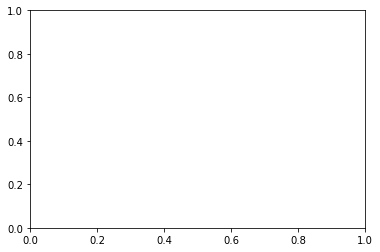

In [12]:
# plot Θ vs. F
plt.cla()
plt.plot(x, df['day1_T'], label='Θ Day1 (Degs)')
plt.plot(x, df['day2_T'], label='Θ Day2 (Degs)')
plt.plot(x, df['day3_T'], label='Θ Day3 (Degs)')
plt.plot(x, df['day4_T'], label='Θ Day4 (Degs)')
plt.plot(x, df['day5_T'], label='Θ Day5 (Degs)')
plt.plot(x, df['day6_T'], label='Θ Day6 (Degs)')
plt.plot(x, df['day7_T'], label='Θ Day7 (Degs)')
plt.plot(x, df['day8_T'], label='Θ Day8 (Degs)')
plt.plot(x, df['day9_T'], label='Θ Day9 (Degs)')

plt.legend(loc='best')
plt.tight_layout()
plt.grid(True)
plt.xscale('log')
#plt.yscale('log')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Theta (Degs)')
plt.title('F vs. Θ Plot')

plt.show()

### Cole-Cole Plot

In [13]:
# calculate real and imaginary part of Z
# Z = R + iX
# R = |Z|*cos(Θ)
# X = |Z|*sin(Θ)

import numpy as np
R1 = df['day1_|Zc|']*np.cos(df['day1_T']* np.pi / 180.)
X1 = df['day1_|Zc|']*np.sin(df['day1_T']* np.pi / 180.)

R2 = df['day2_|Zc|']*np.cos(df['day2_T']* np.pi / 180.)
X2 = df['day2_|Zc|']*np.sin(df['day2_T']* np.pi / 180.)

R3 = df['day3_|Zc|']*np.cos(df['day3_T']* np.pi / 180.)
X3 = df['day3_|Zc|']*np.sin(df['day3_T']* np.pi / 180.)

R4 = df['day4_|Zc|']*np.cos(df['day4_T']* np.pi / 180.)
X4 = df['day4_|Zc|']*np.sin(df['day4_T']* np.pi / 180.)

R5 = df['day5_|Zc|']*np.cos(df['day5_T']* np.pi / 180.)
X5 = df['day5_|Zc|']*np.sin(df['day5_T']* np.pi / 180.)

R6 = df['day6_|Zc|']*np.cos(df['day6_T']* np.pi / 180.)
X6 = df['day6_|Zc|']*np.sin(df['day6_T']* np.pi / 180.)

R7 = df['day7_|Zc|']*np.cos(df['day7_T']* np.pi / 180.)
X7 = df['day7_|Zc|']*np.sin(df['day7_T']* np.pi / 180.)

R8 = df['day8_|Zc|']*np.cos(df['day8_T']* np.pi / 180.)
X8 = df['day8_|Zc|']*np.sin(df['day8_T']* np.pi / 180.)

R9 = df['day9_|Zc|']*np.cos(df['day9_T']* np.pi / 180.)
X9 = df['day9_|Zc|']*np.sin(df['day9_T']* np.pi / 180.)

NameError: name 'df' is not defined

In [14]:
# Cole-Cole Plot
plt.plot(R1, X1, label='Day1')
plt.plot(R2, X2, label='Day2')
plt.plot(R3, X3, label='Day3')
plt.plot(R4, X4, label='Day4')
plt.plot(R5, X5, label='Day5')
plt.plot(R6, X6, label='Day6')
plt.plot(R7, X7, label='Day7')
plt.plot(R8, X8, label='Day8')
plt.plot(R9, X9, label='Day9')

plt.legend(loc='best')
plt.tight_layout()
plt.grid(True)
plt.xlabel('Real (Ω)')
plt.ylabel('Imag.(Ω)')
plt.title('Cole-Cole Plot')

plt.show()

NameError: name 'R1' is not defined

### F vs. Capacitance Plot

In [15]:
# capacitance(C) and conductance(G)
# Z = R + iX
# C = (-X)/(2*pi*f)
# G = 1/R
C1 = (-X1)/ (2*np.pi*df['Frequency'])
C2 = (-X2)/ (2*np.pi*df['Frequency'])
C3 = (-X3)/ (2*np.pi*df['Frequency'])
C4 = (-X4)/ (2*np.pi*df['Frequency'])
C5 = (-X5)/ (2*np.pi*df['Frequency'])
C6 = (-X6)/ (2*np.pi*df['Frequency'])
C7 = (-X7)/ (2*np.pi*df['Frequency'])
C8 = (-X8)/ (2*np.pi*df['Frequency'])
C9 = (-X9)/ (2*np.pi*df['Frequency'])

G1 = 1/R1
G2 = 1/R2
G3 = 1/R3
G4 = 1/R4
G5 = 1/R5
G6 = 1/R6
G7 = 1/R7
G8 = 1/R8
G9 = 1/R9


NameError: name 'X1' is not defined

In [16]:
# plot C vs. F
plt.plot(x, C1, label='Day1')
plt.plot(x, C2, label='Day2')
plt.plot(x, C3, label='Day3')
plt.plot(x, C4, label='Day4')
plt.plot(x, C5, label='Day5')
plt.plot(x, C6, label='Day6')
plt.plot(x, C7, label='Day7')
plt.plot(x, C8, label='Day8')
plt.plot(x, C9, label='Day9')

plt.legend(loc='best')
plt.tight_layout()
plt.grid(True)
#plt.xscale('log')
#plt.yscale('log')
plt.title('Capacitance vs. F')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Capacitance (F)')
plt.show()

NameError: name 'x' is not defined

### F vs. Condcuctance Plot

In [17]:
# plot  G vs. F
plt.plot(x, G1, label='Day1')
plt.plot(x, G2, label='Day2')
plt.plot(x, G3, label='Day3')
plt.plot(x, G4, label='Day4')
plt.plot(x, G5, label='Day5')
plt.plot(x, G6, label='Day6')
plt.plot(x, G7, label='Day7')
plt.plot(x, G8, label='Day8')
plt.plot(x, G9, label='Day9')

plt.legend(loc='best')
plt.tight_layout()
plt.grid(True)
#plt.xscale('log')
#plt.yscale('log')
plt.title('Conductance vs. F')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Conductance (S)')
plt.show()

NameError: name 'x' is not defined

### |Z| vs. Days Plot

In [18]:
# plot |Z| vs. days
x = [1,2,3,4,5,6,7,8,9]
days_Z = df[['day1_|Zc|','day2_|Zc|','day3_|Zc|','day4_|Zc|','day5_|Zc|','day6_|Zc|','day7_|Zc|','day8_|Zc|','day9_|Zc|']].mean()
plt.xticks(range(10), '0 Day1 Day2 Day3 Day4 Day5 Day6 Day7 Day8 Day9'.split())
plt.plot(x,days_Z)

plt.tight_layout()
plt.grid(True)
plt.title('Impedance of tomato following 9 days')
plt.xlabel('Days')
plt.ylabel('|Z| (Ohms)')
plt.show()


NameError: name 'df' is not defined

### |Z| Histogram Plot

In [19]:
# plot histogram
plt.hist(days_Z, bins=10, rwidth=.8, color='green', alpha=.4)

plt.tight_layout()
plt.grid(True)
plt.title('Impedance of Tomato Histogram')
plt.xlabel('|Z| range bins')
plt.ylabel('# of |Z| range bins')
plt.show()

NameError: name 'days_Z' is not defined

## 4. PCA

In [20]:
# Splitting the data into 70% training and 30% test subsets.
from sklearn.model_selection import train_test_split
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                   random_state=0)

NameError: name 'df' is not defined

In [21]:
# Standardizing the data.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)


NameError: name 'X_train' is not defined

In [22]:
# PCA
from sklearn.decomposition import PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

NameError: name 'X_train_std' is not defined

In [23]:
import matplotlib.pyplot as plt
import numpy as np
plt.bar(range(1, 19), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, 19), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.grid(True)

plt.show()

AttributeError: 'PCA' object has no attribute 'explained_variance_ratio_'

In [24]:
# plot Explained Variance @ pca.explained_variance_ratio_
import plotly.express as px
explained_variance = pca.explained_variance_ratio_[0:2]
explained_variance = np.insert(explained_variance, 0, 0)
cumulative_variance = np.cumsum(np.round(explained_variance, decimals=3))

df_pc = pd.DataFrame(['','PC1', 'PC2'], columns=['PC'])
df_explained_variance = pd.DataFrame(explained_variance, columns=['Explained Variance'])
df_cumulative_variance  = pd.DataFrame(cumulative_variance, columns=['Cumulative Variance'])

df_var_cum = pd.concat([df_pc, df_explained_variance, df_cumulative_variance], axis=1)
df_var_cum

ModuleNotFoundError: No module named 'plotly'

In [25]:
import plotly.express as px
fig = px.bar(df_var_cum, 
             x='PC', y='Explained Variance',
             text='Explained Variance',
             width=800)
fig.update_traces(texttemplate='%{text:.3f}', textposition='outside')
fig.show()

ModuleNotFoundError: No module named 'plotly'

In [26]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
fig = make_subplots(rows=1, cols=2)

fig.add_trace(
    go.Scatter(
        x=df_var_cum['PC'],
        y=df_var_cum['Cumulative Variance'],
        marker=dict(size=15, color="LightSeaGreen")
    ), row=1, col=1
    )

fig.add_trace(
    go.Bar(
        x=df_var_cum['PC'],
        y=df_var_cum['Explained Variance'],
        marker=dict(color="RoyalBlue"),
    ), row=1, col=2
    )

fig.show()

ModuleNotFoundError: No module named 'plotly'

In [27]:
# decide PCA dimenstion
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

X_train_pca.shape

NameError: name 'X_train_std' is not defined

In [28]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1],
            alpha=0.5)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.grid(True)
plt.show()

NameError: name 'X_train_pca' is not defined

## 5. ML

In [29]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot examples by class
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    color=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

In [30]:
from sklearn.linear_model import LogisticRegression

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

lr = LogisticRegression(multi_class='ovr', random_state=1, solver='lbfgs')
#lr = lr.fit(X_train_pca, y_train)

NameError: name 'X_train_std' is not defined

issue: y_train is frequency NOT Label